___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [88]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [89]:
df_male = pd.read_csv("ANSUR II MALE Public.csv",encoding='latin-1')

In [90]:
df_female = pd.read_csv("ANSUR II FEMALE Public (1).csv")

## Explore Data

In [91]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [92]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [93]:
df_male.shape

(4082, 108)

In [94]:
df_female.shape

(1986, 108)

In [95]:
df_male.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [96]:
df_female.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [97]:
veri = pd.concat([df_male, df_female], axis=0, ignore_index=True)
veri

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,...,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,...,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,...,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,...,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,...,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,NaN,285,1392,335,223,1297,252,196,368,299,...,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.0
6064,NaN,262,1324,301,202,1204,236,181,378,294,...,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.0
6065,NaN,260,1334,318,213,1259,234,183,363,332,...,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.0
6066,NaN,205,1293,302,199,1207,213,163,376,276,...,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.0


In [98]:
veri.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [99]:
veri.isnull().sum().any()

True

In [100]:
veri.duplicated().sum()

0

**subjectid** – A unique number for each participant measured in the anthropometric survey,  ranging from 10027 to 920103, not inclusive 
- SubjectBirthLocation – Subject Birth Location; a U.S. state or foreign country 
- SubjectNumericRace – Subject Numeric Race; a single or multi-digit code  indicating a subject’s self-reported race or races (verified through interview).  Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American,  6 = Pacific Islander, 8 = Other 
- Ethnicity – self-reported ethnicity (verified through interview); e.g. “Mexican”,  “Vietnamese” 
- DODRace – Department of Defense Race; a single digit indicating a subject’s  self-reported preferred single race where selecting multiple races is not an option.  This variable is intended to be comparable to the Defense Manpower Data Center  demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian,  5 = Native American, 6 = Pacific Islander, 8 = Other 
- Gender – “Male” or “Female” 
- Age – Participant’s age in years 
- Heightin – Height in Inches; self-reported, comparable to measured “stature” ∙ Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg” 
- WritingPreference – Writing Preference; “Right hand”, “Left hand”, or  “Either hand (No preference)” 
- Date – Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12” 
- Installation – U.S. Army installation where the measurement occurred;  e.g. “Fort Hood”, “Camp Shelby”
2 
2012 US Army Anthropometric Working Databases (ANSUR II) 
- Component – “Army National Guard”, “Army Reserve”, or “Regular Army” ∙ Branch – “Combat Arms”, “Combat Support”, or “Combat Service Support” 
- PrimaryMOS – Primary Military Occupational Specialty 
5. Anthropometric Data: the following variables are included in the ANSUR II working  databases for each subject and were directly-measured dimensions of the participant’s body. All  measurements are recorded in millimeters with the exception of the variable “weightkg”. 
- **abdominalextensiondepthsitting** – Abdominal Extension Depth, Sitting ∙ acromialheight – Acromial Height 
- acromionradialelength – Acromion-Radiale Length 
- anklecircumference – Ankle Circumference 
- axillaheight – Axilla Height 
- balloffootcircumference – Ball of Foot Circumference 
- balloffootlength – Ball of Foot Length 
- biacromialbreadth – Biacromial Breadth 
- bicepscircumferenceflexed – Biceps Circumference, Flexed 
- bicristalbreadth – Bicristal Breadth 
- bideltoidbreadth – Bideltoid Breadth 
- bimalleolarbreadth – Bimalleolar Breadth 
- bitragionchinarc – Bitragion Chin Arc 
- bitragionsubmandibulararc – Bitragion Submandibular Arc 
- bizygomaticbreadth – Bizygomatic Breadth
3 
2012 US Army Anthropometric Working Databases (ANSUR II) 
- buttockcircumference – Buttock Circumference 
- buttockdepth – Buttock Depth 
- buttockheight – Buttock Height 
- buttockkneelength – Buttock-Knee Length 
- buttockpopliteallength – Buttock-Popliteal Length 
- calfcircumference – Calf Circumference 
- cervicaleheight – Cervical Height 
- chestbreadth – Chest Breadth 
- chestcircumference – Chest Circumference 
- chestdepth – Chest Depth 
- chestheight – Chest Height 
- crotchheight – Crotch Height 
- crotchlengthomphalion – Crotch Length (Omphalion) 
- crotchlengthposterioromphalion – Crotch Length, Posterior (Omphalion) ∙ earbreadth – Ear Breadth 
- earlength – Ear Length 
- earprotrusion – Ear Protrusion 
- elbowrestheight – Elbow Rest Height 
- eyeheightsitting – Eye Height, Sitting 
4 
2012 US Army Anthropometric Working Databases (ANSUR II) 
- footbreadthhorizontal – Foot Breadth, Horizontal  ∙ footlength – Foot Length  
- forearmcenterofgriplength – Forearm-Center of Grip Length ∙ forearmcircumferenceflexed – Forearm Circumference, Flexed  ∙ forearmforearmbreadth – Forearm-Forearm Breadth ∙ forearmhandlength – Forearm -Hand Length  
- functionalleglength – Functional Leg Length 
- handbreadth – Hand Breadth  
- handcircumference – Hand Circumference 
- handlength – Hand Length 
- headbreadth – Head Breadth 
- headcircumference – Head Circumference 
- headlength – Head Length 
- heelanklecircumference – Heel-Ankle Circumference ∙ heelbreadth – Heel Breadth 
- hipbreadth – Hip Breadth 
- hipbreadthsitting – Hip Breadth, Sitting 
- iliocristaleheight – Iliocristale Height 
- interpupillarybreadth – Interpupillary Breadth ∙ interscyei – Interscye I
5 
2012 US Army Anthropometric Working Databases (ANSUR II) 
- interscyeii – Interscye II 
- kneeheightmidpatella – Knee Height, Midpatella 
- kneeheightsitting – Knee Height, Sitting 
- lateralfemoralepicondyleheight – Lateral Femoral Epicondyle Height ∙ lateralmalleolusheight – Lateral Malleolus Height 
- lowerthighcircumference – Lower Thigh Circumference ∙ mentonsellionlength – Menton-Sellion Length 
- neckcircumference – Neck Circumference 
- neckcircumferencebase – Neck Circumference, Base ∙ overheadfingertipreachsitting – Overhead Fingertip Reach, Sitting ∙ palmlength – Palm Length 
- poplitealheight – Popliteal Height 
- radialestylionlength – Radiale-Stylion Length 
- shouldercircumference – Shoulder Circumference 
- shoulderelbowlength – Shoulder-Elbow Length 
- shoulderlength – Shoulder Length 
- sittingheight – Sitting Height 
- sleevelengthspinewrist – Sleeve Length: Spine-Wrist ∙ sleeveoutseam – Sleeve Outseam
6 
2012 US Army Anthropometric Working Databases (ANSUR II) 
- span - Span 
- stature - Stature 
- suprasternaleheight – Suprasternale Height 
- tenthribheight – Tenth Rib Height 
- thighcircumference – Thigh Circumference  
- thighclearance – Thigh Clearance  
- thumbtipreach – Thumbtip Reach  
- tibialheight – Tibiale Height 
- tragiontopofhead – Tragion-Top of Head 
- trochanterionheight – Trochanterion Height 
- verticaltrunkcircumferenceusa – Vertical Trunk Circumference (USA) ∙ waistbacklength – Waist Back Length (Omphalion) 
- waistbreadth – Waist Breadth  
- waistcircumference – Waist Circumference (Omphalion) ∙ waistdepth – Waist Depth 
- waistfrontlengthsitting – Waist Front Length, Sitting  ∙ waistheightomphalion – Waist Height (Omphalion) 
- weightkg – Weight (in kg*10) 
- wristcircumference – Wrist Circumference 
- wristheight – Wrist Height


In [101]:
veri.sample(10)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
3983,29229.0,228,1489,340,228,1373,250,212,427,326,...,11B,Texas,51,Cherokee,1,21,72,180,Right hand,NaN
3976,29217.0,264,1401,334,230,1277,258,206,410,365,...,13F,North Carolina,1,NaN,1,46,68,185,Right hand,NaN
5693,NaN,353,1438,338,230,1323,261,199,381,405,...,92G,Antigua and Barbuda,8,Caribbean Islander,2,31,68,260,Right hand,28154.0
5371,NaN,187,1410,327,207,1306,215,183,368,274,...,25B,Nebraska,1,NaN,1,18,69,127,Right hand,25656.0
5138,NaN,194,1320,306,222,1227,232,185,356,265,...,68W,Texas,1,NaN,1,25,65,135,Left hand,24107.0
6061,NaN,201,1297,310,213,1203,204,181,360,268,...,90A,New York,1,NaN,1,32,63,124,Left hand,29497.0
1828,16599.0,249,1407,329,206,1303,252,182,391,373,...,13B,Barbados,8,Caribbean Islander,2,46,69,167,Right hand,NaN
3735,28702.0,235,1515,359,240,1403,262,215,429,392,...,31B,Pennsylvania,41,Vietnamese,4,31,74,215,Left hand,NaN
5438,NaN,202,1372,324,203,1281,229,180,336,274,...,71E,Germany,1,NaN,1,41,65,122,Right hand,25826.0
5495,NaN,212,1274,317,203,1173,232,180,383,325,...,35G,South Carolina,2,NaN,2,23,62,150,Right hand,25934.0


In [102]:
veri.head().T

,0,1,2,3,4
subjectid,10027.0,10032.0,10033.0,10092.0,10093.0
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
...,...,...,...,...,...
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213
WritingPreference,Right hand,Left hand,Left hand,Right hand,Right hand


In [103]:
veri.isnull().sum()

subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
                                  ... 
Age                                  0
Heightin                             0
Weightlbs                            0
WritingPreference                    0
SubjectId                         4082
Length: 109, dtype: int64

In [104]:
veri.shape

(6068, 109)

## Drop

In [105]:
drop_list=[]
for col in veri :
    if veri [col].isnull().sum()>1500:
        print(f"{col}= {veri[col].isnull().sum()}")
        drop_list.append(col)
              

subjectid= 1986
Ethnicity= 4647
SubjectId= 4082


In [106]:
veri.drop(drop_list, axis=1, inplace=True)

In [107]:
veri.shape

(6068, 106)

In [108]:
veri_object = veri.select_dtypes(include ="object").head()
veri_object

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,Right hand


In [109]:
for col in veri_object:
    print(f"{col:<30}:", veri[col].nunique())

Gender                        : 2
Date                          : 253
Installation                  : 12
Component                     : 3
Branch                        : 3
PrimaryMOS                    : 285
SubjectsBirthLocation         : 152
WritingPreference             : 3


In [110]:
drop_list1 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin"   
]

veri.drop(drop_list1, axis=1, inplace=True)

In [111]:
veri[["DODRace","SubjectNumericRace"]]

,DODRace,SubjectNumericRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
6063,3,3
6064,3,3
6065,2,2
6066,3,3


In [112]:
veri.drop("SubjectNumericRace",axis=1,inplace=True)

In [113]:
veri.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [114]:
veri = veri[veri["DODRace"].isin([1,2,3])]
veri.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

1    0.657306
2    0.224996
3    0.117698
Name: DODRace, dtype: float64


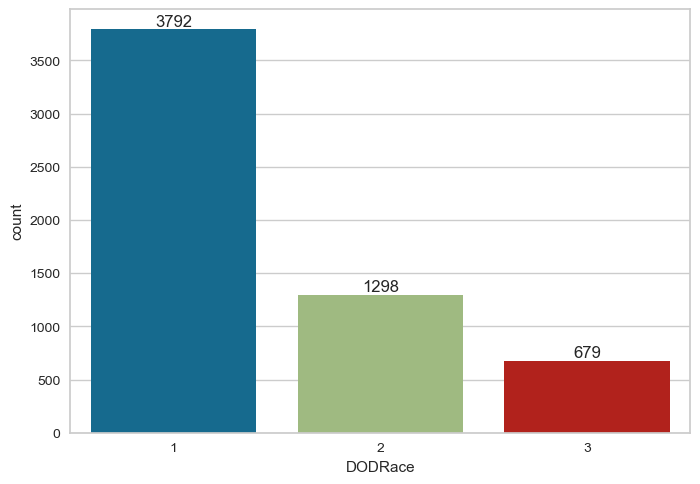

In [115]:
print(veri["DODRace"].value_counts(normalize=True))
ax=sns.countplot(data= veri, x="DODRace")
ax.bar_label(ax.containers[0]);

<AxesSubplot:>

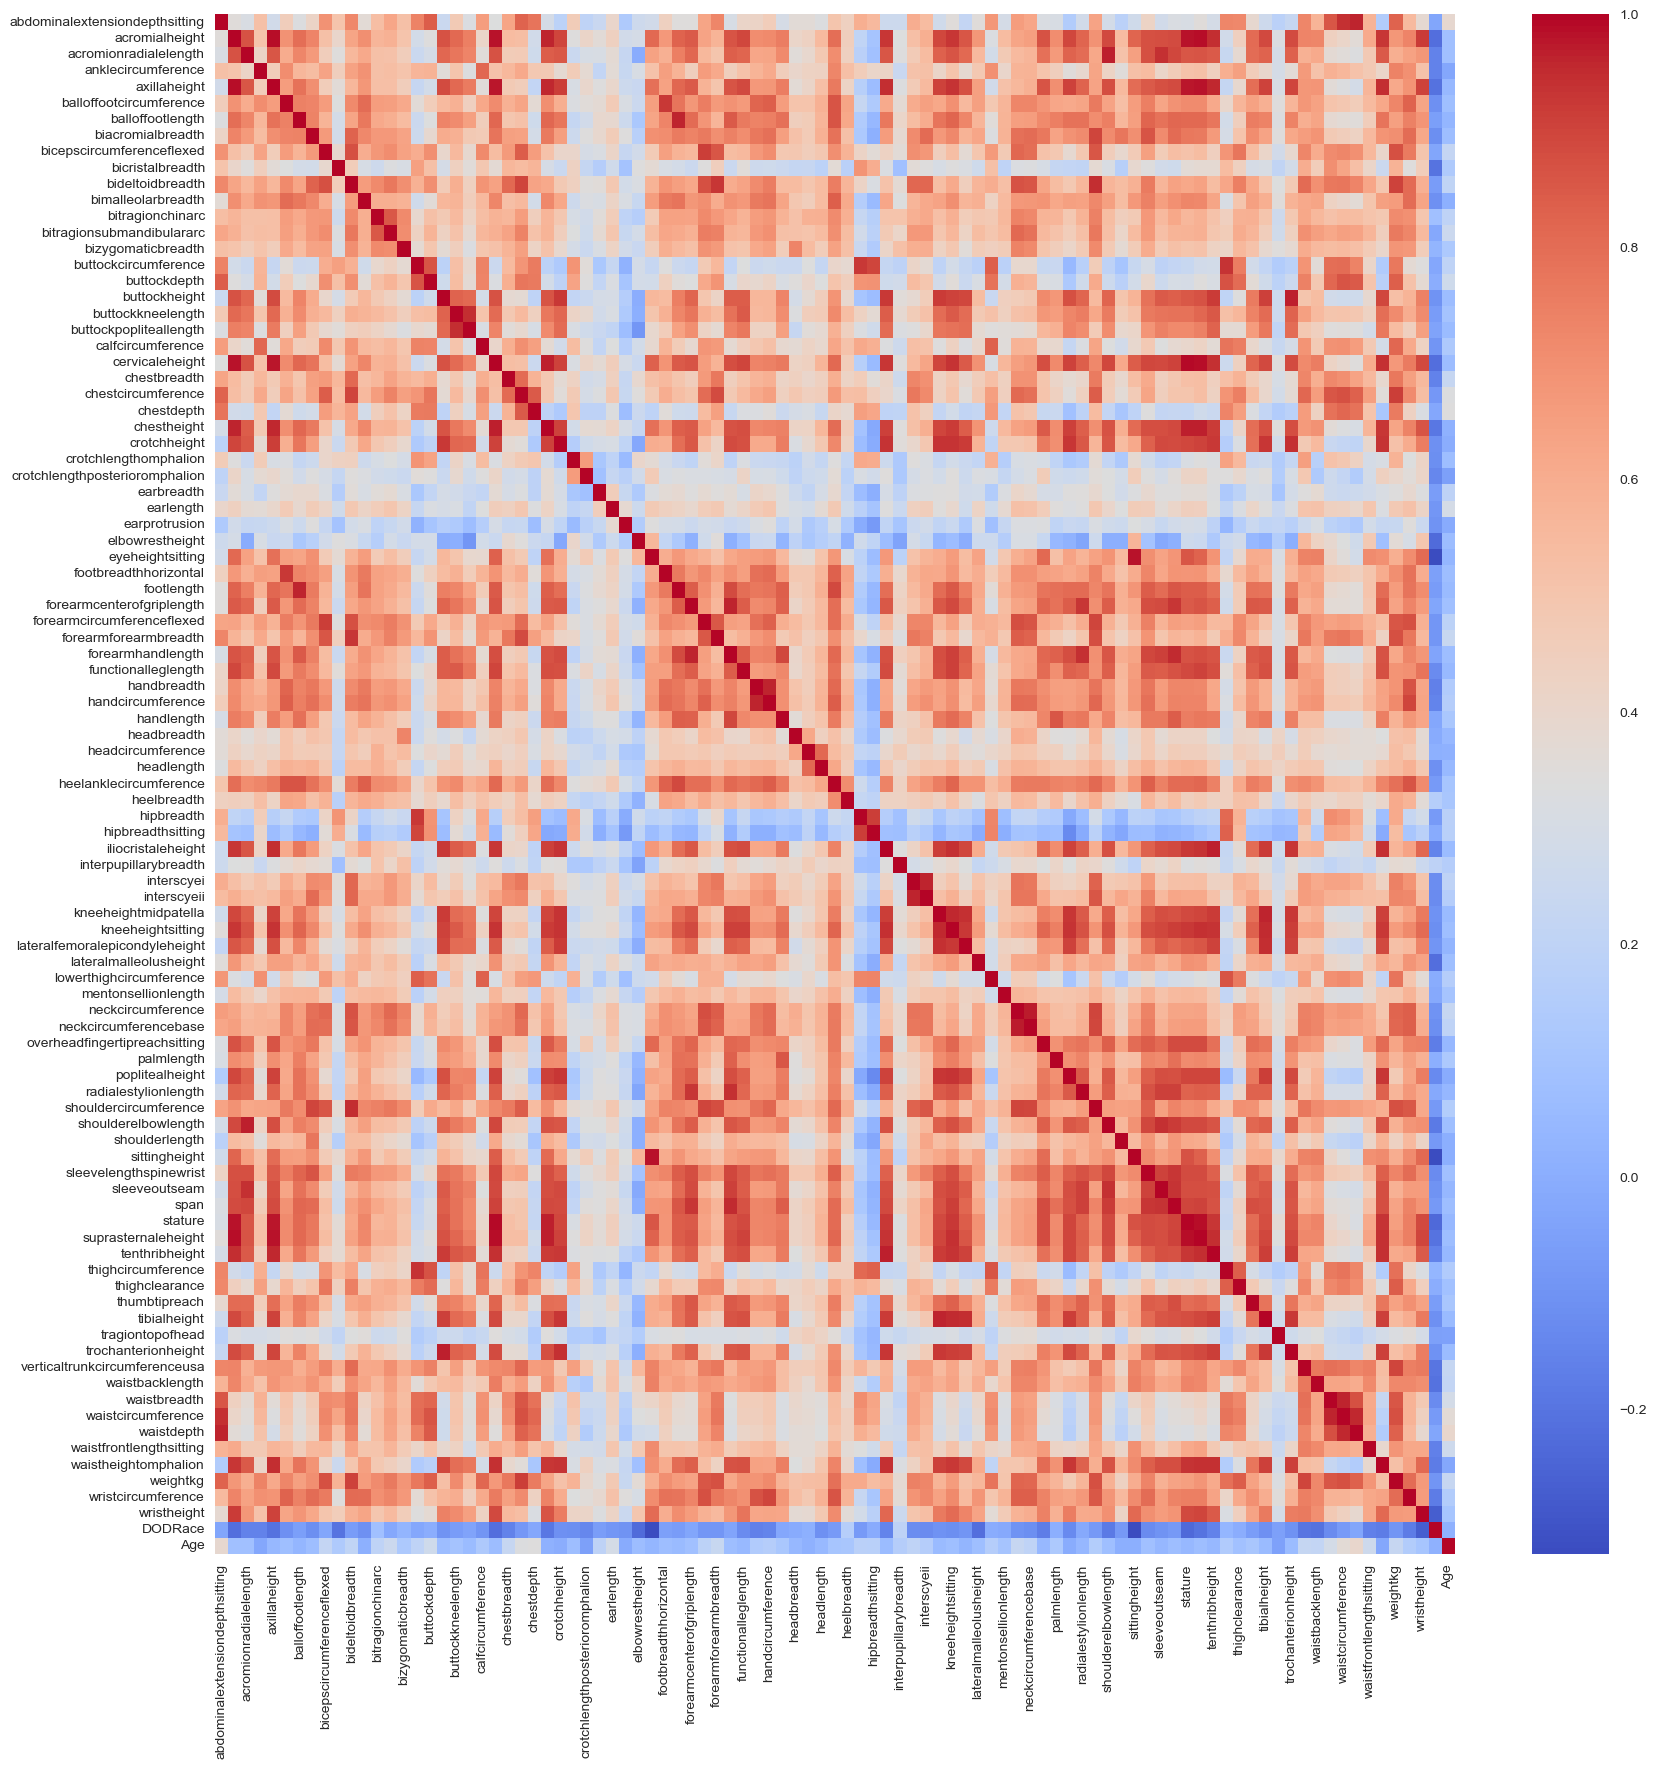

In [116]:
plt.figure(figsize=(20,20))
sns.heatmap(veri.corr(), cmap ="coolwarm")

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [118]:
X = veri.drop("DODRace",axis=1)
y = veri.DODRace

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [120]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [121]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [122]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [123]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [124]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [125]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[651  17  90]
 [ 16 229  15]
 [ 20   8 108]]
              precision    recall  f1-score   support

           1       0.95      0.86      0.90       758
           2       0.90      0.88      0.89       260
           3       0.51      0.79      0.62       136

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[2604   60  370]
 [  26  976   36]
 [  73   22  448]]
              precision    recall  f1-score   support

           1       0.96      0.86      0.91      3034
           2       0.92      0.94      0.93      1038
           3       0.52      0.83      0.64       543

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [126]:
from sklearn.metrics import fbeta_score, make_scorer
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [127]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.0
test_precision_Hispanic    0.0
test_recall_Hispanic       0.0
dtype: float64

### Logistic Model GridsearchCV

In [128]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [129]:
param_grid = {
    "log__C": [1, 5, 10],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [130]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [131]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [132]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='liblinear'))])

In [133]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l1', 'log__solver': 'liblinear'}

In [134]:
log_model_grid.best_score_

0.0

In [135]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[708  17  33]
 [ 20 231   9]
 [ 37   8  91]]
              precision    recall  f1-score   support

           1       0.93      0.93      0.93       758
           2       0.90      0.89      0.90       260
           3       0.68      0.67      0.68       136

    accuracy                           0.89      1154
   macro avg       0.84      0.83      0.83      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[2840   45  149]
 [  40  982   16]
 [ 136   29  378]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94      3034
           2       0.93      0.95      0.94      1038
           3       0.70      0.70      0.70       543

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



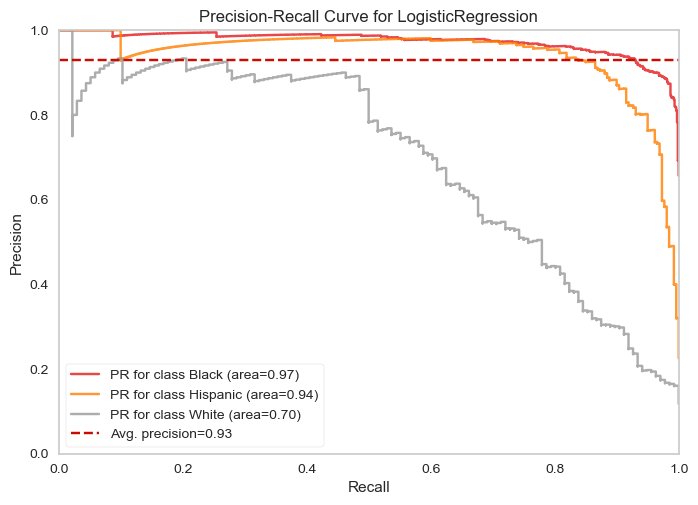

In [136]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [137]:
viz.score_

{'Black': 0.9739994673768557,
 'Hispanic': 0.9434719451683015,
 'White': 0.6957279569722957,
 'micro': 0.9286455133667891}

In [138]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [139]:
from sklearn.svm import SVC

In [140]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [141]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[636  16 106]
 [ 19 223  18]
 [ 18   8 110]]
              precision    recall  f1-score   support

           1       0.95      0.84      0.89       758
           2       0.90      0.86      0.88       260
           3       0.47      0.81      0.59       136

    accuracy                           0.84      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.84      0.85      1154


Train_Set
[[2575   50  409]
 [  38  967   33]
 [  74   21  448]]
              precision    recall  f1-score   support

           1       0.96      0.85      0.90      3034
           2       0.93      0.93      0.93      1038
           3       0.50      0.83      0.63       543

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



In [142]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.0
test_precision_Hispanic    0.0
test_recall_Hispanic       0.0
dtype: float64

###  SVC Model GridsearchCV

In [143]:
param_grid = {
    'svc__C': [1,2],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [144]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [145]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [146]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 'scale'}

In [147]:
svm_model_grid.best_score_

0.0

In [148]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[636  16 106]
 [ 19 223  18]
 [ 18   8 110]]
              precision    recall  f1-score   support

           1       0.95      0.84      0.89       758
           2       0.90      0.86      0.88       260
           3       0.47      0.81      0.59       136

    accuracy                           0.84      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.84      0.85      1154


Train_Set
[[2575   50  409]
 [  38  967   33]
 [  74   21  448]]
              precision    recall  f1-score   support

           1       0.96      0.85      0.90      3034
           2       0.93      0.93      0.93      1038
           3       0.50      0.83      0.63       543

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



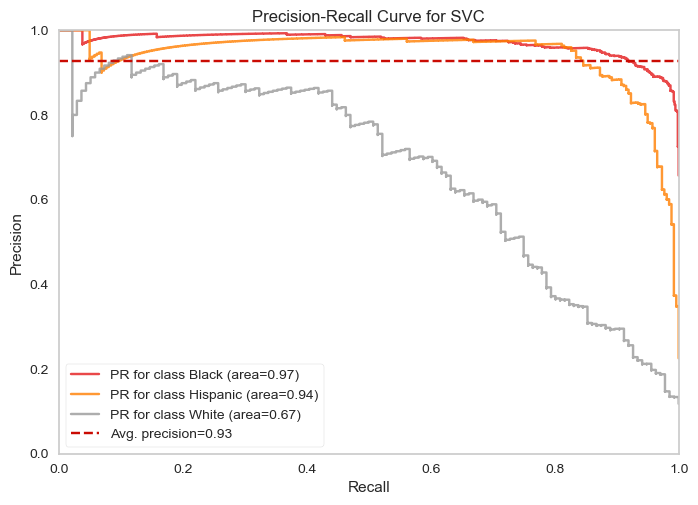

In [149]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [150]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [151]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [152]:
categories = X.select_dtypes("object").columns
categories

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [153]:
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
column_trans = make_column_transformer((ord_enc, categories), remainder="passthrough")

In [154]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [155]:
operations = [("OrdinalEncoder", column_trans), ("rf", RandomForestClassifier(class_weight="balanced", random_state=42))]
pipe_rf_model = Pipeline(steps=operations)

pipe_rf_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [156]:
eval_metric(pipe_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[748  10   0]
 [ 86 174   0]
 [118  11   7]]
              precision    recall  f1-score   support

           1       0.79      0.99      0.87       758
           2       0.89      0.67      0.76       260
           3       1.00      0.05      0.10       136

    accuracy                           0.81      1154
   macro avg       0.89      0.57      0.58      1154
weighted avg       0.83      0.81      0.76      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [157]:
operations = [("OrdinalEncoder", column_trans), ("rf", RandomForestClassifier(class_weight="balanced", random_state=42))]
pipe_rf_model = Pipeline(steps=operations)

scores = cross_validate(pipe_rf_model, X_train, y_train, 
                        scoring=["f1_macro", "precision_macro", "recall_macro", "accuracy"], 
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_f1_macro           0.568523
test_precision_macro    0.833506
test_recall_macro       0.564717
test_accuracy           0.806501
dtype: float64

### RF Model GridsearchCV

In [158]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]}

In [159]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [160]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [161]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=400, random_state=101))])

In [162]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [163]:
rf_grid_model.best_score_

0.0

In [164]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[416  60 282]
 [ 24 175  61]
 [ 45  11  80]]
              precision    recall  f1-score   support

           1       0.86      0.55      0.67       758
           2       0.71      0.67      0.69       260
           3       0.19      0.59      0.29       136

    accuracy                           0.58      1154
   macro avg       0.59      0.60      0.55      1154
weighted avg       0.75      0.58      0.63      1154


Train_Set
[[1684  253 1097]
 [ 115  755  168]
 [ 146   44  353]]
              precision    recall  f1-score   support

           1       0.87      0.56      0.68      3034
           2       0.72      0.73      0.72      1038
           3       0.22      0.65      0.33       543

    accuracy                           0.60      4615
   macro avg       0.60      0.64      0.58      4615
weighted avg       0.76      0.60      0.65      4615



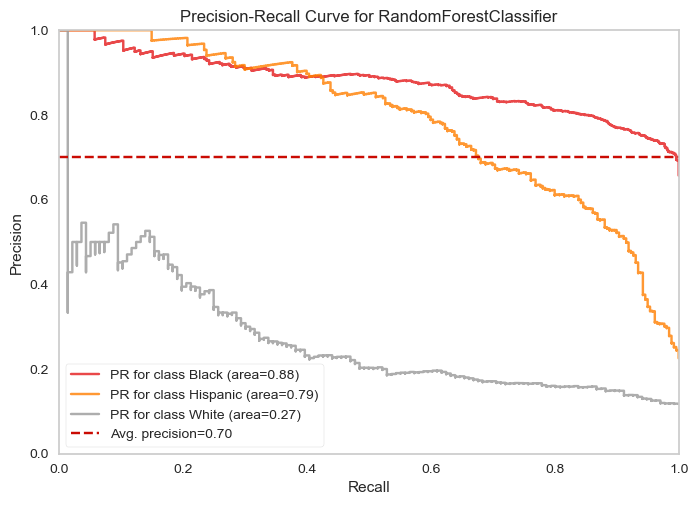

In [165]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=2, n_estimators=400, random_state=101))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [166]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [174]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
xgb.__version__

'1.7.3'

In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [177]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [183]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.8330264 , 0.50703142, 1.4820167 , ..., 1.4820167 , 0.50703142,
       2.8330264 ])

In [187]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train.reset_index()
comp.groupby("label")[0].value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [181]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [185]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[  0   0   0   0]
 [708  21  29   0]
 [ 32 219   9   0]
 [ 57  16  63   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.08      0.03      0.04       758
           2       0.09      0.03      0.05       260
           3       0.00      0.00      0.00       136

    accuracy                           0.03      1154
   macro avg       0.04      0.02      0.02      1154
weighted avg       0.07      0.03      0.04      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [186]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.0
test_precision_Hispanic    0.0
test_recall_Hispanic       0.0
dtype: float64

### XGBoost Model GridsearchCV

In [188]:
param_grid = {"XGB_model__n_estimators":[50, 100],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [189]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [190]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=1, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=50,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [191]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 50,
 'XGB_model__subsample': 0.8}

In [192]:
xgb_grid_model.best_score_

0.0

In [193]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[  0   0   0   0]
 [479  75 204   0]
 [ 26 179  55   0]
 [ 31  17  88   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.28      0.10      0.15       758
           2       0.16      0.21      0.18       260
           3       0.00      0.00      0.00       136

    accuracy                           0.11      1154
   macro avg       0.11      0.08      0.08      1154
weighted avg       0.22      0.11      0.14      1154


Train_Set
[[1903  296  835]
 [ 120  771  147]
 [ 132   69  342]]
              precision    recall  f1-score   support

           0       0.88      0.63      0.73      3034
           1       0.68      0.74      0.71      1038
           2       0.26      0.63      0.37       543

    accuracy                           0.65      4615
   macro avg       0.61      0.67      0.60      4615
weighted avg       0.76      0.65      0.68      4615



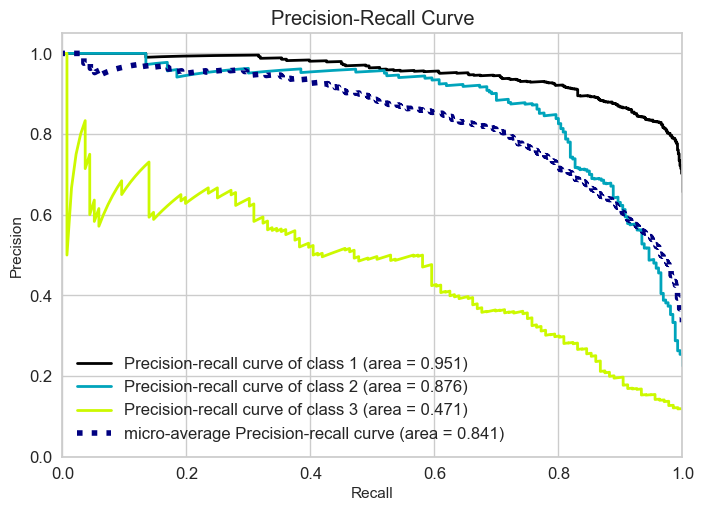

In [194]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(learning_rate=0.3, max_depth=1,
                            random_state=101, subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
#y_pred = model.predict(X_test)
#Plot metrics 
#plot_roc(y_test, y_score)
#plt.show()
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [203]:
!pip install imblearn

In [218]:
conda install -c conda-forge imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: imbalanced-learn


In [225]:
from imblearn.over_sampling import SMOTE # azınlık olan classları çoğunluk classa eşitler veya yakınlaştırır.
from imblearn.under_sampling import RandomUnderSampler # çoğunluk olan classı azınlık olan classa eşitler veya yakınlaştırır
from imblearn.pipeline import Pipeline as imbpipeline

In [220]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [221]:
X_train_ohe = column_trans.fit_transform(X_train)

In [222]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train_ohe, y_train)

In [223]:
X_over.shape

(9102, 229)

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___